In [1]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install git+https://github.com/Effective-Quadratures/Effective-Quadratures.git@master # for specific branch

import numpy as np                                                                                                                                                                                      
import matplotlib.pyplot as plt
from equadratures import *

### Load data

In [2]:
if IN_COLAB: 
    !wget https://raw.githubusercontent.com/ascillitoe/EQ-live/ash_proto/Prototyping/ML_regression/robust_regression/x.npy -O x.npy
    !wget https://raw.githubusercontent.com/ascillitoe/EQ-live/ash_proto/Prototyping/ML_regression/robust_regression/y.npy -O y.npy
    
x = np.load('x.npy')
y = np.load('y.npy')

# Remove actual outlier 
index = np.squeeze([(y>0.76) & (y<0.82)])
x = x[index,:]
y = y[index]

### Find subspace

In [3]:
mysubspace = Subspaces(method='active-subspace', sample_points=x, sample_outputs=y, polynomial_degree=1,subspace_dimension=1)

### Plot

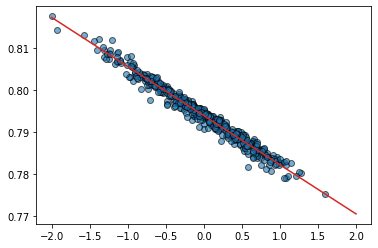

In [4]:
fig,ax = plt.subplots()
#ax.set_ylim([0.75,0.85])

M = mysubspace.get_subspace()
w = M[:,0:1]
u = x @ w
subpoly = mysubspace.get_subspace_polynomial()

utest = np.linspace(-2,2,200)
ypred = np.squeeze(subpoly.get_polyfit(utest))

plt.plot(u,y,'o',mec='k',ms=6,alpha=0.6)
plt.plot(utest,ypred,'C3-')

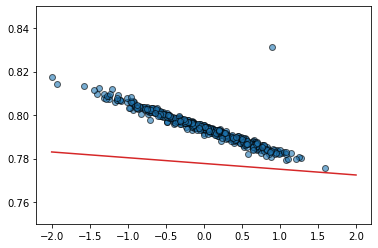

In [9]:
# Add fake outliers (10 out of 500)
nout = 10
state = 2
index = np.random.RandomState(state).choice(len(y),nout,replace=False)
y[index] += np.random.RandomState(state).uniform(-1,1,nout)*0.9

fig,ax = plt.subplots()
ax.set_ylim([0.75,0.85])

M = mysubspace.get_subspace()
w = M[:,0:1]
u = x @ w
subpoly = mysubspace.get_subspace_polynomial()

utest = np.linspace(-2,2,200)
ypred = np.squeeze(subpoly.get_polyfit(utest))

plt.plot(u,y,'o',mec='k',ms=6,alpha=0.6)
plt.plot(utest,ypred,'C3-')